In [1]:
import numpy as np
from glob import glob
import itertools
import numpy as np
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=20)


import matplotlib.pyplot as plt
import seaborn as sns
from src.utils.parse_config import read_config_file

INFO: Pandarallel will run on 20 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
# indir = ""
# method_names = ""
# outdir = ""
params_f = "/home/isshamie/data/Projects/Mito_Trace/parameters/pipeline/pipeline.yaml"
cfg_f = "/home/isshamie/data/Projects/Mito_Trace/parameters/pipeline/cosmo_server/jan21_2021.yaml"
all_files = ""
#names = ""
outdir = ""
all_files = "/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_10/concat/cells_meta.tsv,/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv,/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_meta.tsv,/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/cells_meta.tsv"
outdir = "/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/comparisons"

In [3]:
all_files = all_files.split(",")

In [4]:
params = read_config_file(params_f)
params

{'main': ['mtscATAC',
  'mtpreproc',
  'multiplex',
  'clones',
  'enrichment',
  'DE',
  'annotation_clones'],
 'cellranger_path': '/data2/resources/software/cellranger_6_1_1/cellranger-6.1.1/',
 'samtools_path': '/data2/resources/software/cellranger_6_1_1/cellranger-6.1.1/external/anaconda/bin',
 'genome_path': {'MTBlacklist': {'genome_dir': 'data/external/GRCh38_MT_blacklist/',
   'ref_fa': 'data/external/GRCh38_MT_blacklist/fasta/genome.fa',
   'mt_ref_fa': 'data/external/GRCh38_MT_blacklist/chrM.fasta'},
  'MTblacklist_mtasnucl': {'genome_dir': 'data/external/GRCh38_MT_blacklist/',
   'ref_fa': 'data/external/GRCh38_MT_blacklist/fasta/genome.fa',
   'mt_ref_fa': 'data/external/GRCh38_MT_blacklist/chrM.fasta'}},
 'mtpreproc': {'version': 2,
  'params': {'cellrbc': [True], 'numreadsfilter': [200], 'basequality': [20]},
  'mito_character': 'chrM',
  'maxBP': 16571},
 'filters': {'params': {'mincells': [10],
   'minreads': [50],
   'topN': [0],
   'hetthresh': [0.001],
   'minhetcells

In [5]:
cfg = read_config_file(cfg_f)
cfg

params["prefix"] = cfg["prefix"]
params["outdir"] = cfg["outdir"]

In [6]:
%load_ext autoreload
%autoreload 2
from src.files import create_single_files


In [7]:
params_files = create_single_files(params, "clones")
params_files = params_files.set_index('file')

#print(params_files.loc[0, 'file'])

params_files.iloc[0]

cols ['mincells', 'minreads', 'topN', 'hetthresh', 'minhetcells', 'hetcountthresh', 'bqthresh', 'cellrbc', 'numreadsfilter', 'basequality', 'lowcovthresh', 'ncellsthresh', 'method', 'variants', 'nclonelist', 'resolution', 'cdf_thresh', 'min_pct', 'logfc_threshold']
col_vals [(10,), (50,), (0,), (0.001,), (10,), (5,), (20,), (True,), (200,), (20,), (2,), (5,), ('vireo', 'knn'), ('simple', 'mgatkdonor'), (20,), (10, 3), (0.3,), (0.01, 0), (0.1, 0)]
19
19
iter
rule cellrbc
rule create_filters
rule mgatk
rule clones
rule cellrbc
rule create_filters
rule mgatk
rule clones
rule cellrbc
rule create_filters
rule mgatk
rule clones
rule cellrbc
rule create_filters
rule mgatk
rule clones
rule cellrbc
rule create_filters
rule mgatk
rule clones
rule cellrbc
rule create_filters
rule mgatk
rule clones
rule cellrbc
rule create_filters
rule mgatk
rule clones
rule cellrbc
rule create_filters
rule mgatk
rule clones
rule cellrbc
rule create_filters
rule mgatk
rule clones
rule cellrbc
rule create_filters
r

mincells               10
minreads               50
topN                    0
hetthresh           0.001
minhetcells            10
hetcountthresh          5
bqthresh               20
cellrbc              True
numreadsfilter        200
basequality            20
lowcovthresh            2
ncellsthresh            5
method              vireo
variants           simple
nclonelist             20
resolution             10
cdf_thresh            0.3
min_pct              0.01
logfc_threshold       0.1
Name: /home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20, dtype: object

In [8]:
params_files

,mincells,minreads,topN,hetthresh,minhetcells,hetcountthresh,bqthresh,cellrbc,numreadsfilter,basequality,lowcovthresh,ncellsthresh,method,variants,nclonelist,resolution,cdf_thresh,min_pct,logfc_threshold
file,,,,,,,,,,,,,,,,,,,
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20,10,50,0,0.001,10,5,20,True,200,20,2,5,vireo,simple,20,10,0.3,0.01,0.1
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20,10,50,0,0.001,10,5,20,True,200,20,2,5,vireo,simple,20,10,0.3,0.01,0.0
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20,10,50,0,0.001,10,5,20,True,200,20,2,5,vireo,simple,20,10,0.3,0.00,0.1
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20,10,50,0,0.001,10,5,20,True,200,20,2,5,vireo,simple,20,10,0.3,0.00,0.0
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20,10,50,0,0.001,10,5,20,True,200,20,2,5,vireo,simple,20,3,0.3,0.01,0.1
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20,10,50,0,0.001,10,5,20,True,200,20,2,5,vireo,simple,20,3,0.3,0.01,0.0
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20,10,50,0,0.001,10,5,20,True,200,20,2,5,vireo,simple,20,3,0.3,0.00,0.1
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20,10,50,0,0.001,10,5,20,True,200,20,2,5,vireo,simple,20,3,0.3,0.00,0.0
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20,10,50,0,0.001,10,5,20,True,200,20,2,5,vireo,mgatkdonor,20,10,0.3,0.01,0.1


In [9]:
all_files

['/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_10/concat/cells_meta.tsv',
 '/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv',
 '/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_meta.tsv',
 '/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/cells_me

In [10]:
from os.path import join
import os
import pandas as pd

In [11]:
#names = names.split(" ")
all_methods = []

all_methods_df = pd.read_csv(all_files[0], sep='\t').set_index("ID")

curr_out = (join(outdir, all_files[0]))#.replace("/", "_")
all_outs = [curr_out]
all_methods_df[curr_out] = all_methods_df["lineage"]
all_methods_df = all_methods_df[["condition", "donor", curr_out] ]

for ind, i in enumerate(all_files[1:]):
    print(i)
    curr_out = (join(outdir, i))#.replace("/", "_") #names[ind])
    curr_df = pd.read_csv(i, sep='\t').set_index("ID")
    curr_df[curr_out] = curr_df["lineage"]

    all_outs.append(curr_out)
    all_methods_df = pd.merge(all_methods_df, curr_df[[curr_out]], 
                              left_index=True, right_index=True,how='outer')
    all_methods_df = all_methods_df[["condition", "donor"]+all_outs]

    #all_methods.append(curr_df) #[curr_out] = curr_df

/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_meta.tsv
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/cells_meta.tsv


## Create cell-pair vector
keys: 
- 0: Not same clone 
- 1: In same clone
- -1: Both are NA
- -2: One is NA


In [12]:
def calc_cell_pairs(cell_ser, clones_series):
    curr_id = cell_ser.name
#     print('curr_id', curr_id)
#     print('clones_series', clones_series.head())
    curr_clone = clones_series.loc[curr_id]
    if np.isnan(curr_clone):
        cell_ser.loc[:] == -1
        cell_ser.loc[clones_series.loc[clones_series.isnull()].index] = -2
    else:
        cell_ser.loc[:] = (curr_clone == clones_series.loc[cell_ser.index])
        cell_ser.loc[clones_series.loc[clones_series.isnull()].index] = -1
    return cell_ser



In [13]:
donor_all_methods_pairs_df = {}
for d, curr_methods_df in all_methods_df.groupby("donor"):
    print('donor', d)
    donor_all_methods_pairs_df[d] = {}
    # d = 0
    # curr_methods_df = all_methods_df.loc[all_methods_df["donor"]==d]
    #curr_donor_all_methods_pairs_df = {}

    for i in curr_methods_df.drop(["condition", "donor"], axis=1).columns:
        print('i', i)
        cell_pairs_df = pd.DataFrame(index=curr_methods_df.index, columns=curr_methods_df.index)
        donor_all_methods_pairs_df[d][i] = cell_pairs_df.parallel_apply(calc_cell_pairs, 
                                                            args=(curr_methods_df[i],), axis=1)



donor 0
i /home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_10/concat/cells_meta.tsv
i /home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv
i /home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_meta.tsv
i /home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/cells_

In [14]:
donor_all_methods_pairs_df[0].keys()

dict_keys(['/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_10/concat/cells_meta.tsv', '/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv', '/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_meta.tsv', '/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/c

In [15]:
def get_title(fname, params_files):
    pre_ind = fname.find('/')
    prefix = fname[:pre_ind]
    curr_file = fname[pre_ind:].replace("/concat", "").replace("/cells_meta.tsv", "")
    #print('curr_file', curr_file)
    params = params_files.loc[curr_file].iloc[0]
    #print('params', params[["method", "nclonelist", "resolution"]])
    if params['method'] == 'knn':
        meth_params = params['resolution']
    if params['method'] == 'vireo':        
        meth_params = params['nclonelist']
    return f"Variants method: {params['variants']}\n clones method: {params['method']}\nClones params: {meth_params}"


In [16]:
def calc_meth_overlap(meth_a, meth_b, use_na=False):
    n_T_T = ((meth_a == True) & (meth_b==True)).values.sum()
    n_F_F = ((meth_a == False) & (meth_b==False)).values.sum()
    n_F_T = ((meth_a == False) & (meth_b==True)).values.sum()
    n_T_F = ((meth_a == True) & (meth_b==False)).values.sum()
    
    n_nas_mone = ((meth_a == -1) & (meth_b==-1)).values.sum()
    n_nas_mtwo = ((meth_a == -2) & (meth_b==-2)).values.sum()
    
    n_nas_both = ((meth_a < 0) & (meth_b<0)).values.sum()
    n_nas_mis = (((meth_a < 0) & (meth_b >= 0)) | ((meth_a >= 0) & (meth_b < 0))).values.sum()
    
    
    n_together = n_T_T + n_F_F + n_F_T + n_T_F
    
    #out_meth = meth_a == meth_b
    
    if not use_na:
        meth_a = meth_a.drop(meth_a<0)
        meth_b = meth_b.drop(meth_b<0)
        
        
        
        inds = set(meth_a.index).intersection(set(meth_b.index))
        meth_a = meth_a.loc[inds]
        meth_b = meth_b.loc[inds]
    #jaccard(meth_a, meth_b)
    n_T_T_norm = n_T_T/n_together
    n_T_F_norm = n_T_F/n_together
    n_F_T_norm = n_F_T/n_together
    n_F_F_norm = n_F_F/n_together
    return {"n_T_T":n_T_T, "n_F_F":n_F_F,
            "n_F_T":n_F_T, "n_T_F":n_T_F, 
            
            "n_T_T_norm":n_T_T_norm, "n_F_F_norm":n_F_F_norm,
            "n_F_T_norm":n_F_T_norm, "n_T_F_norm":n_T_F_norm, 
            
            "n_nas_mone":n_nas_mone, "n_nas_mtwo":n_nas_mtwo, 
            "n_nas_both":n_nas_both, "n_nas_mis":n_nas_mis,
            "n_together":n_together, 
            "n_agree": n_T_T  +n_F_F
           }

In [17]:
meth_df = pd.DataFrame(columns=["donor", "m1", "m2", "n_agree", "n_T_T", "n_F_F", "n_F_T", "n_T_F", 
                                "n_T_T_norm", "n_F_F_norm", 
                                "n_F_T_norm", "n_T_F_norm", "n_nas_mone", "n_nas_mtwo", 
                                "n_nas_both", "n_nas_mis", "n_together"])

for d, curr_methods_df in all_methods_df.groupby("donor"):
    print('donor', d)
    curr_d_methods = list(donor_all_methods_pairs_df[d].keys())
    curr_d_pairs = list(itertools.product(curr_d_methods, repeat=2))
    for curr_pair in curr_d_pairs:
        if curr_pair[0] == curr_pair[1]:
            continue
        print("curr_pair")
        print(curr_pair[0])
        print(curr_pair[1])
        a = donor_all_methods_pairs_df[d][curr_pair[0]]
        b = donor_all_methods_pairs_df[d][curr_pair[1]]
        curr_out = calc_meth_overlap(a,b)
        curr_out["donor"] = d
        curr_out["m1"] = get_title(curr_pair[0], params_files) #curr_pair[0]
        curr_out["m2"] = get_title(curr_pair[1], params_files) #curr_pair[1]
        meth_df = meth_df.append(pd.DataFrame(curr_out, index= [f"d{d}_m1{curr_pair[0]}_m2{curr_pair[1]}"]))
        #meth_df.loc[curr_pair]
meth_df["n_agree_norm"] = meth_df["n_agree"]/meth_df["n_together"]

donor 0
curr_pair
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_10/concat/cells_meta.tsv
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv
curr_pair
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_10/concat/cells_meta.tsv
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo

curr_pair
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/cells_meta.tsv
curr_pair
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_meta.tsv
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_10/concat/ce

curr_pair
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/cells_meta.tsv
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/knn/kparam_3/concat/cells_meta.tsv
curr_pair
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_mgatkdonor/vireo/nclones20/cells_meta.tsv
/home/isshamie/data/Projects/Mito_Trace/output/pipeline/cd34norm/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simple/vireo/nclones20/cells_m

## Correlation Heatmaps for different metrics

In [18]:
sns.set(font_scale=1.2)
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    metric = args[0] #kwargs.pop(args[0])
    print('metric', metric)
    d = data.pivot(index="m1", columns="m2", values=[args[0]])
    #d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)
    return

def donors_heatmap(df, metric, title=""): 
    df[metric] = df[metric].astype('float')
    g = sns.FacetGrid(df, col="donor", col_wrap=2, height=8, aspect=1)
    g.map_dataframe(draw_heatmap, metric, cbar=True, square=True)
    g.figure.suptitle(title)#"Methods comparison: #pairs in shared clusters clusters")
    plt.tight_layout()
    return

metric n_agree
metric n_agree
metric n_agree
metric n_agree


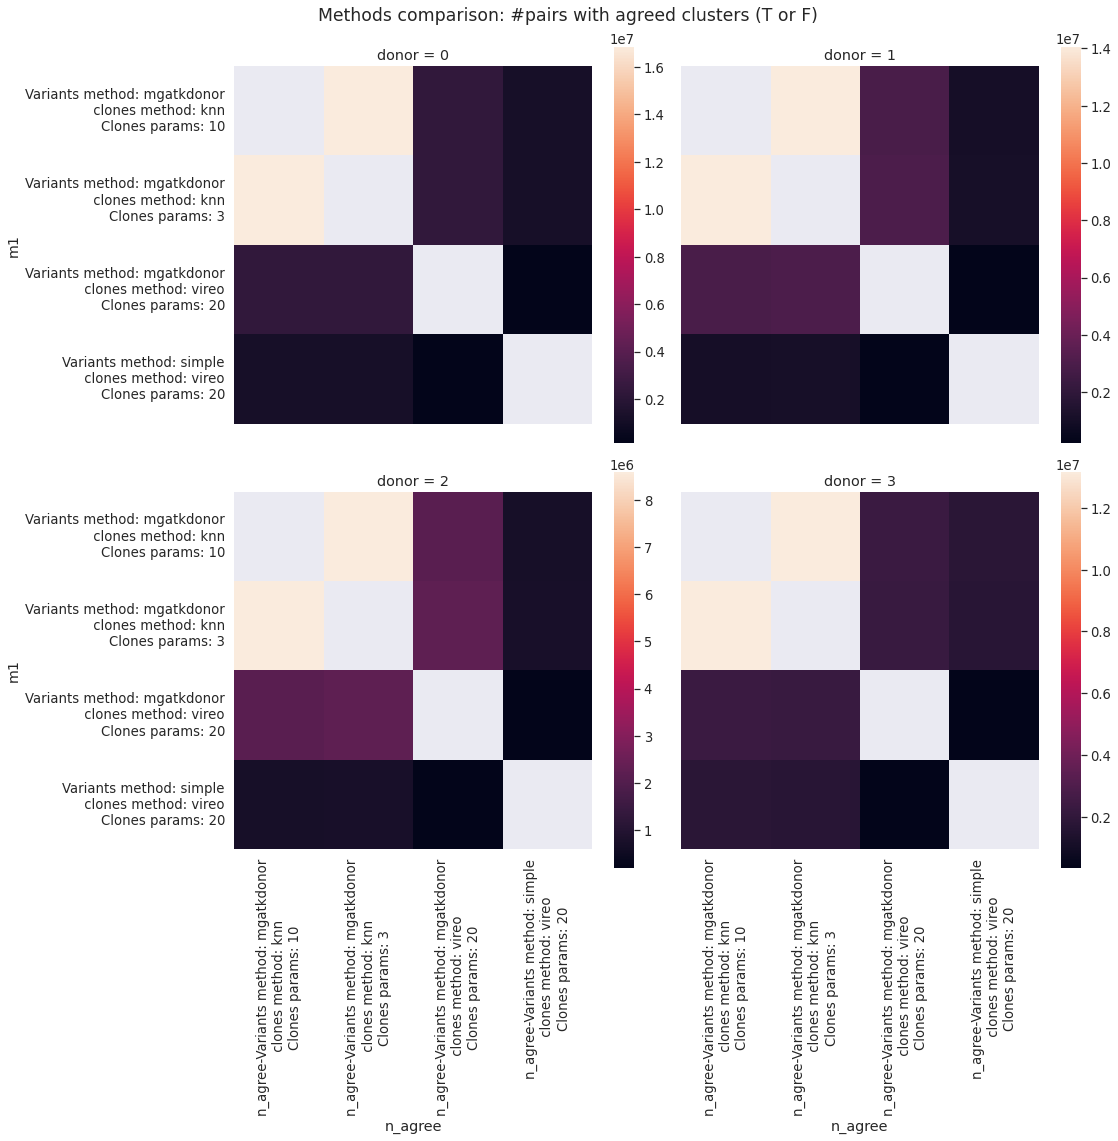

In [19]:
donors_heatmap(meth_df, metric="n_agree", 
               title="Methods comparison: #pairs with agreed clusters (T or F)")
plt.savefig(join(outdir, "methods_nAgree.png"))

metric n_T_T
metric n_T_T
metric n_T_T
metric n_T_T


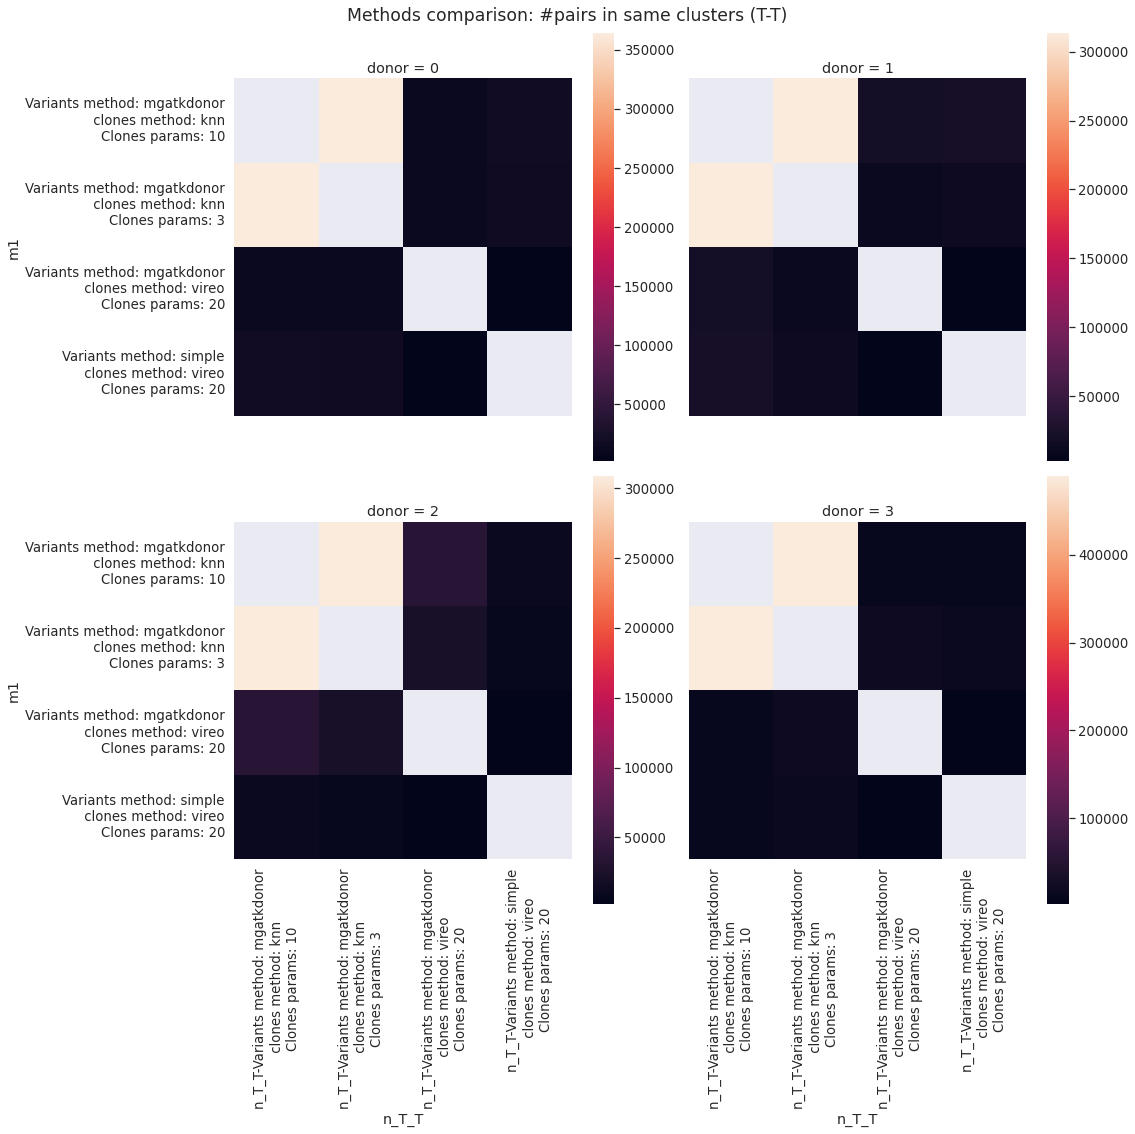

In [20]:
donors_heatmap(meth_df, metric="n_T_T", 
               title="Methods comparison: #pairs in same clusters (T-T)")
plt.savefig(join(outdir, "methods_nTT.png"))
# for d, df in meth_df.groupby("donor"):
#     f=plt.figure()
#     sns.heatmap(df.pivot(index="m1", columns="m2", values=["n_T_T"]).astype('float'))
#     plt.title(f"Methods comparison: #pairs in shared clusters clusters\n donor {d}")

metric n_agree_norm
metric n_agree_norm
metric n_agree_norm
metric n_agree_norm


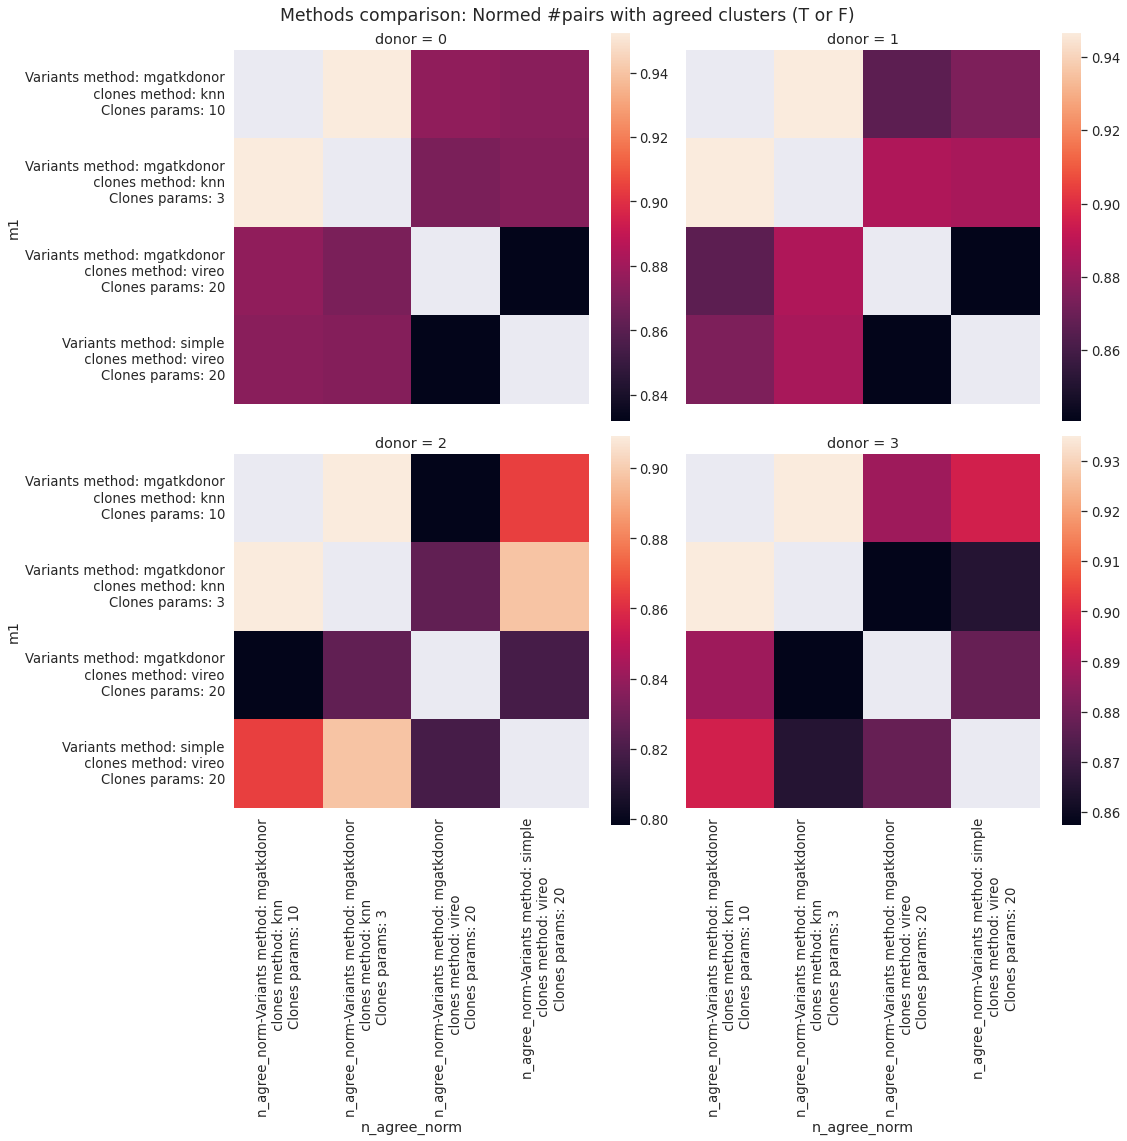

In [21]:
donors_heatmap(meth_df, metric="n_agree_norm", 
               title="Methods comparison: Normed #pairs with agreed clusters (T or F)")
plt.savefig(join(outdir, "methods_nAgreeNorm.png"))

# for d, df in meth_df.groupby("donor"):
#     f=plt.figure()
#     sns.heatmap(df.pivot(index="m1", columns="m2", values=["n_agree_norm"]).astype('float'))
#     plt.title(f"Methods comparison: Normed #pairs with agreed clusters (T or F)\n donor {d}")

metric n_T_T_norm
metric n_T_T_norm
metric n_T_T_norm
metric n_T_T_norm


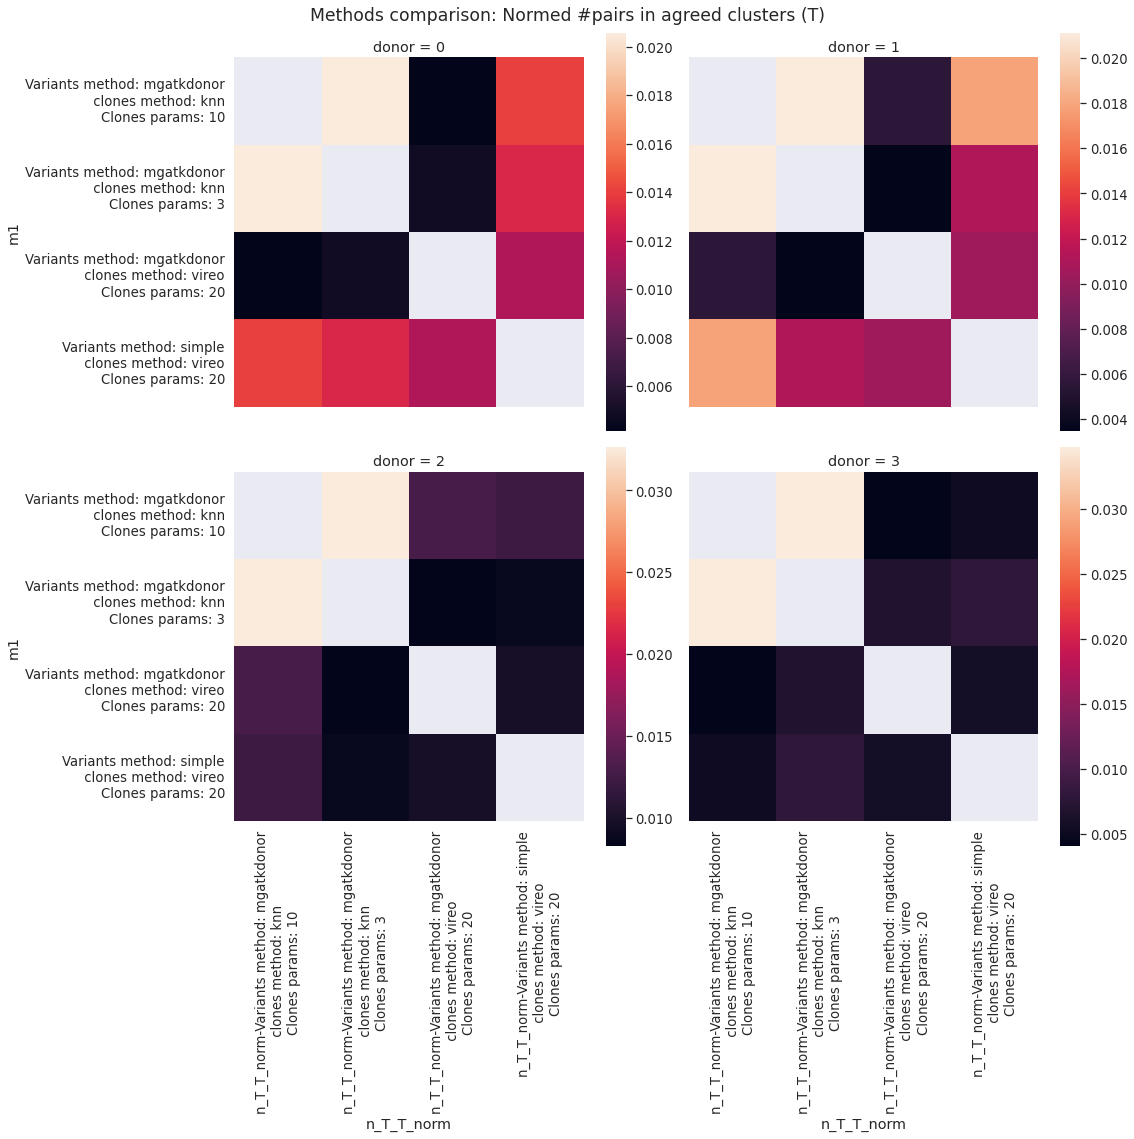

In [22]:
donors_heatmap(meth_df, metric="n_T_T_norm", title="Methods comparison: Normed #pairs in agreed clusters (T)")
plt.savefig(join(outdir, "methods_nTTNorm.png"))


In [23]:
meth_df.to_csv(join(outdir, "methods_comparisons.csv"))

params_files.to_csv(join(outdir, "params_files.csv"))